# Genetic Image Compressor

Samuel Goedert

This notebook is a demonstration of the algorithms described in the accompanying paper. Please read the paper first as the algorithms are only demonstrated here and not described. Running this notebook will allow you to watch the progress of the image as the algorithms are running. I encourage you to tweak the parameters and see the effects on accuracy and elapse-time.

In [1]:
from GeneticImage import GeneticImagePopulation, LayeredGeneticImage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
from IPython.display import clear_output
import time

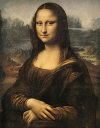

In [2]:
# The image must be smaller than 256x256
img = mpimg.imread('lisa.jpg')
display(Image.fromarray(img))

## Single Layered Algorithm

Set parameters and create population

In [3]:
POP_SIZE = 30
MUT_CHANCE = 0.001
RECTANGLES = 35
GENERATIONS = 5500

In [4]:
population = GeneticImagePopulation(img, POP_SIZE, MUT_CHANCE, RECTANGLES)

Display the image before running the algorithm.

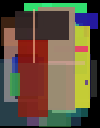

In [5]:
Image.fromarray(population.make_image(population.pop[0]).astype(np.uint8))

Run and show error and image.

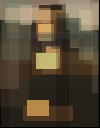

Loss 567468
CPU times: user 3min 19s, sys: 104 ms, total: 3min 19s
Wall time: 3min 19s


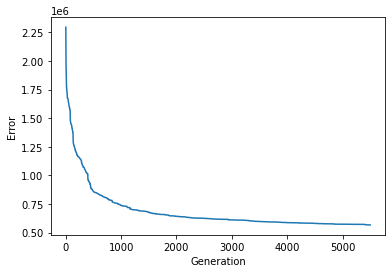

In [6]:
%%time
losses = []
for i in range(GENERATIONS):
    losses.append(population.sort())
    population.naturally_select()
    
    # every 20 generations show information
    if i % 20 == 0:
        clear_output()
        print(f"Generation:{i} Loss:{losses[-1]}", end="\x1b[1K\r")        
        display(Image.fromarray(population.make_image(population.pop[0]).astype(np.uint8)))
        
plt.plot(losses)
plt.xlabel("Generation")
plt.ylabel("Error")
clear_output()
display(Image.fromarray(population.make_image(population.pop[0]).astype(np.uint8)))
print("Loss " + str(losses[-1]))

## Layered Genetic Image Compressor

Set parameters and create set of populations.

In [7]:
POP_SIZE=18
RECTANGLES=1
MUT_CHANCE=0.02
LAYERS=130
GENERATIONS=1000

In [8]:
lp = LayeredGeneticImage(img, [POP_SIZE] * LAYERS,[MUT_CHANCE] * LAYERS, [RECTANGLES] * LAYERS)

Set current layer to final one and generate the image.

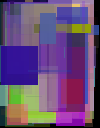

In [9]:
lp.set_layer(lp.layer_count-1)
out_img = lp.make_image(lp.pops[lp.layer_count-1].pop[0])
converted = Image.fromarray(np.array(out_img, dtype=np.uint8))
display(converted)

Run the algorithm and display the results

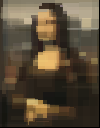

In [ ]:
%%time
losses = []
for layer in range(LAYERS):
    # set the layer
    lp.set_layer(layer)
    # grab previous layers image and convert to displayable format
    s = Image.fromarray(np.array(lp.bg, dtype=np.uint8)) 
    display(s)
    
    lp.pops[layer].sort()
    # iterate through generations
    for i in range(GENERATIONS):
        lp.pops[layer].naturally_select()
        err = lp.pops[layer].sort()
        losses.append(err)
        
    # show info after every layer
    clear_output()
    print(f"Layer:{layer+1} Loss:{err}", end="\x1b[1K\r")
clear_output()
# show final image
s = Image.fromarray(np.array(lp.make_image(lp.pops[layer].pop[0]), dtype=np.uint8))
display(s)
# plot error
plt.plot(losses)
plt.xlabel("Generation")
plt.ylabel("Error")

print("Loss " + str(losses[-1]))

Let's display it layer by layer and see the progression sped up.

In [ ]:
for layer in range(LAYERS):
    # set the layer
    lp.set_layer(layer)
    # grab previous layers image and convert to displayable format
    s = Image.fromarray(np.array(lp.bg, dtype=np.uint8)) 
    clear_output()
    display(s)
    
    time.sleep(0.3)

# show final image
s = Image.fromarray(np.array(lp.make_image(lp.pops[layer].pop[0]), dtype=np.uint8))
clear_output()
display(s)